In [48]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def get_stock_data(ticker, start_date, end_date):
    try:
        # Download historical stock data using yfinance
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        
        # Add the stock symbol as a column
        stock_data['Symbol'] = ticker
        
        # Create a 'Date' column based on the index
        stock_data['Date'] = stock_data.index
    
        return stock_data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None




In [37]:
# Define the stocks and date range
stocks = ['INFY','TCS','WIP','HCLTECH.NS','TECHM.NS','CYIENT.NS','LTTS.NS','PERSISTENT.NS','COFORGE.NS']  # Add more symbols as needed
start_date = '2020-01-01'
end_date = '2023-01-01'
# Create an empty DataFrame to store the combined data
portfolio_data = pd.DataFrame()

# Fetch data for each stock and combine it into the portfolio_data DataFrame
for stock in stocks:
    stock_data = get_stock_data(stock, start_date, end_date)
    if not stock_data.empty:
        portfolio_data = pd.concat([portfolio_data, stock_data], axis=0)

# Save the combined data to a CSV file
portfolio_data.to_csv(r'C:\Users\yasho\Downloads\Finance-Projects\portfolio_data.csv', index=False)
print("Data successfully scraped and saved.")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data successfully scraped and saved.


In [38]:
portfolio_data = pd.read_csv(r'C:\Users\yasho\Downloads\Finance-Projects\portfolio_data.csv')

In [40]:
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'])

In [41]:
portfolio_data['Year'] = portfolio_data['Date'].dt.year
portfolio_data['Month'] = portfolio_data['Date'].dt.month_name()

In [44]:
stock_data = portfolio_data

In [45]:
# Calculate short-term (fast) and long-term (slow) moving averages
stock_data['fast_ma'] = stock_data['Close'].rolling(window=20).mean()
stock_data['slow_ma'] = stock_data['Close'].rolling(window=50).mean()

# Generate signals: Buy when fast_ma crosses above slow_ma, sell when fast_ma crosses below slow_ma
stock_data['Signal'] = 0
stock_data.loc[stock_data['fast_ma'] > stock_data['slow_ma'], 'Signal'] = 1
stock_data.loc[stock_data['fast_ma'] < stock_data['slow_ma'], 'Signal'] = -1

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Apply the trading signals to get position changes
stock_data['Position'] = stock_data['Signal'].diff()

# Remove NaN values
stock_data.dropna(inplace=True)


In [46]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year,Month,fast_ma,slow_ma,Signal,Daily_Return,Position
49,8.60,8.640000,8.000000,8.380000,7.642853,35410600,INFY,2020-03-13,2020,March,10.238500,10.589000,-1,0.040994,-1.0
50,7.35,7.870000,7.240000,7.370000,6.721696,19661600,INFY,2020-03-16,2020,March,10.056500,10.530600,-1,-0.120525,0.0
51,7.40,7.930000,7.120000,7.870000,7.177715,20011000,INFY,2020-03-17,2020,March,9.889500,10.481800,-1,0.067843,0.0
52,7.10,7.530000,7.080000,7.350000,6.703455,25345100,INFY,2020-03-18,2020,March,9.692000,10.424600,-1,-0.066074,0.0
53,7.32,7.350000,7.030000,7.130000,6.502809,13834300,INFY,2020-03-19,2020,March,9.480500,10.365200,-1,-0.029932,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,3749.00,3798.600098,3702.300049,3770.649902,3708.202637,101353,COFORGE.NS,2022-12-26,2022,December,3963.437488,3889.162007,1,0.009423,0.0
6746,3785.00,3880.000000,3784.000000,3874.350098,3810.185303,195437,COFORGE.NS,2022-12-27,2022,December,3958.267493,3891.809009,1,0.027502,0.0
6747,3825.50,3930.000000,3817.000000,3914.500000,3849.670410,190347,COFORGE.NS,2022-12-28,2022,December,3952.177490,3894.837007,1,0.010363,0.0
6748,3870.00,3942.000000,3861.050049,3915.350098,3850.506592,321786,COFORGE.NS,2022-12-29,2022,December,3942.102490,3896.409009,1,0.000217,0.0


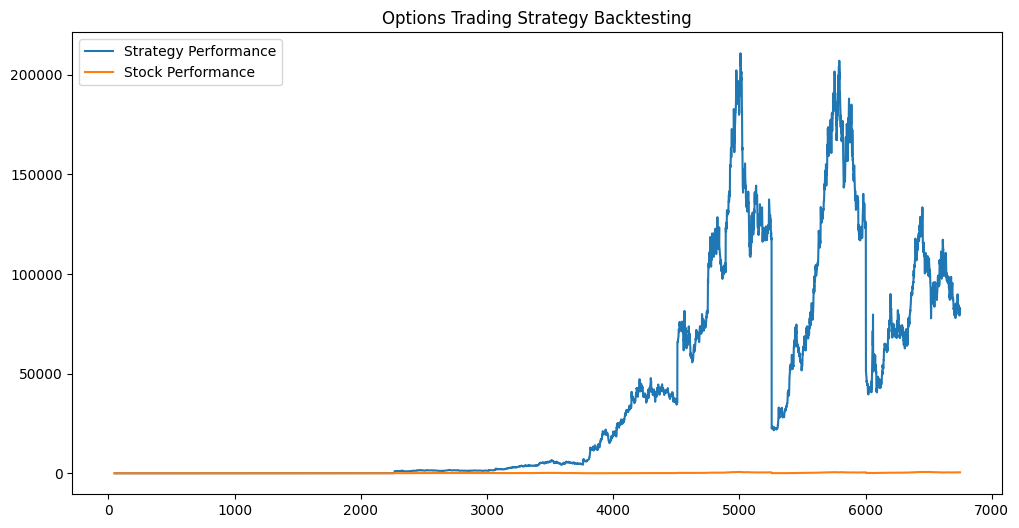

Total Return: 8235484.50%
Annualized Return: 53.06%
Sharpe Ratio: 0.34


In [49]:
# Calculate cumulative returns
stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return'] * stock_data['Signal']).cumprod()

# Plot strategy performance
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Cumulative_Return'], label='Strategy Performance')
plt.plot(stock_data['Close'] / stock_data['Close'].iloc[0], label='Stock Performance')
plt.legend()
plt.title('Options Trading Strategy Backtesting')
plt.show()

# Calculate key performance metrics
total_return = stock_data['Cumulative_Return'].iloc[-1] - 1
annualized_return = (1 + total_return) ** (252 / len(stock_data.index)) - 1  # Assuming 252 trading days in a year
sharpe_ratio = stock_data['Daily_Return'].mean() / stock_data['Daily_Return'].std() * np.sqrt(252)

print(f'Total Return: {total_return:.2%}')
print(f'Annualized Return: {annualized_return:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2}')


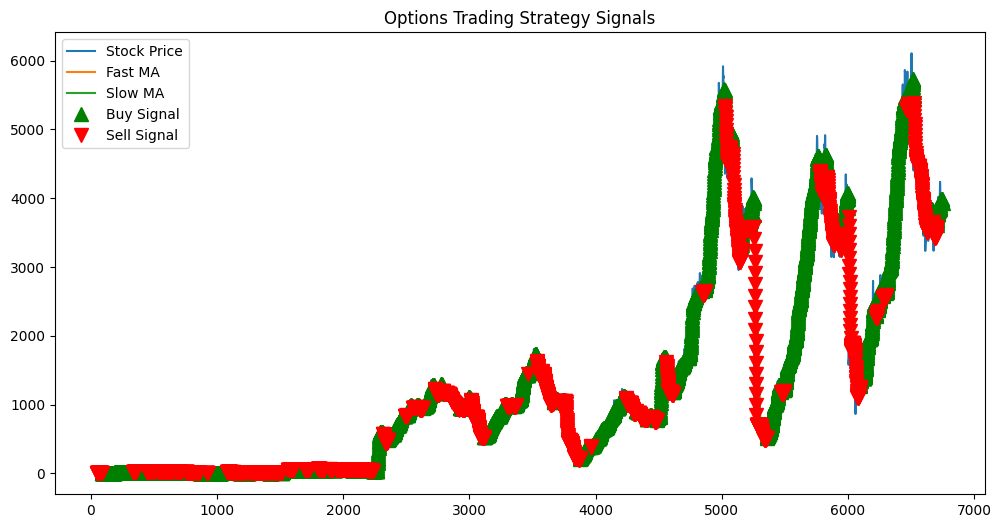

In [50]:
# Plot strategy signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Stock Price')
plt.plot(stock_data['fast_ma'], label='Fast MA')
plt.plot(stock_data['slow_ma'], label='Slow MA')

# Plot Buy signals
plt.plot(stock_data.loc[stock_data['Signal'] == 1].index, 
         stock_data['fast_ma'][stock_data['Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(stock_data.loc[stock_data['Signal'] == -1].index, 
         stock_data['fast_ma'][stock_data['Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Options Trading Strategy Signals')
plt.legend()
plt.show()
